In [0]:
!pip install tweet-preprocessor
!pip install GetOldTweets3
!pip install twitterscraper

  Created wheel for tweet-preprocessor: filename=tweet_preprocessor-0.5.0-cp36-none-any.whl size=7947 sha256=38ddc9e32c3433078a850a62fbf63cc219001cc5b7c3389106a3fed1a65f5cda
  Stored in directory: /root/.cache/pip/wheels/1b/27/cc/49938e98a2470802ebdefae9d2b3f524768e970c1ebbe2dc4a
Successfully built tweet-preprocessor
     |████████████████████████████████| 92kB 7.5MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.4.0-cp36-none-any.whl size=11347 sha256=7b9fe00aa5d0e37a720707731f064fce4c782b5c13f1f99cbcd623e88e660db6
  Stored in directory: /root/.cache/pip/wheels/c2/9c/8b/7393e7bdc8abe6ce0d46c2ffae2035a1a2080a97ff0ddbdde6
Successfully built twitterscraper


In [0]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import matplotlib.pyplot as plt
import pandas as pd
import preprocessor as p
import csv
import string
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
import GetOldTweets3 as got
from tabulate import tabulate

from twitterscraper import query_tweets

In [0]:
def makeDataframe(query, startDate, endDate):
  # Central India lat/long : 23, 80
  # N-S India length : 3300 kms
  tweetCriteria = got.manager.TweetCriteria().setQuerySearch(query)\
                                            .setSince(startDate)\
                                            .setUntil(endDate)\
                                            .setNear("23, 80")\
                                            .setWithin("3300km")\
                                            .setMaxTweets(4000)

  #.setTopTweets(True)\
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  if len(tweets):
    features = tweets[0].__dict__.keys()
    df = pd.DataFrame([[getattr(i,j) for j in features] for i in tweets], columns = features)
    df['query'] = query
    print("Success")
  else:
    print("No tweets found")
    return 0
  
  df.drop(columns=['to', 'permalink', 'formatted_date','urls'],inplace=True)
  df.rename(columns={'id': 'tweet_id','author_id': 'user_id', 'geo':'tweet_location'}, inplace=True)
  df.sort_values(by=['date'], inplace=True)
  print(df.shape)
  df['month'] = df['date'].map(lambda x: x.month)
  df['year'] = df['date'].map(lambda x: x.year)
  return df

Cigarette burn

dirty boys

attention seeking feminist 

fuck yourself

intimidate

unwanted sex 

slut shaming

personal picture online

death threats

nude pictures





In [0]:
query = 'nude pictures'
start = "2020-01-01"
end = "2020-05-21"

In [0]:
df = makeDataframe(query, start, end)

Success
(866, 12)


In [0]:
df

,username,text,retweets,favorites,replies,tweet_id,user_id,date,hashtags,mentions,tweet_location,query,month,year
865,daffasvdiana,Heres my nude pic.twitter.com/GQ5K0MBWIC,0,1,1,1212176318684491777,1025429163920875520,2020-01-01 00:58:50+00:00,,,,nude pictures,1,2020
864,_noradzreen,Japgi dah bosan aku tukar warna nude pic.twitt...,0,1,0,1212270508680478720,2173425036,2020-01-01 07:13:06+00:00,,,,nude pictures,1,2020
863,dj_masashi_nude,@Gws_DJShohey さん 遅くなりましたが お誕生日おめでとうございます ！ pic...,1,4,1,1212373484652752896,2473386954,2020-01-01 14:02:18+00:00,,@Gws_DJShohey,,nude pictures,1,2020
862,dj_masashi_nude,2019年@DJ_MAAM_osaka さん しっかり納めさせていただきました！ ありがとう...,2,9,1,1212402837902151680,2473386954,2020-01-01 15:58:56+00:00,,@DJ_MAAM_osaka,,nude pictures,1,2020
861,premrimal11,When you have all those things you want But ha...,0,0,0,1212590291997224961,772059633800257536,2020-01-02 04:23:49+00:00,,,,nude pictures,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,xxholysmokexx,Ramazan ayında nude dediğin böyle olmalı mı kf...,0,10,0,1263227208501473280,981925655087546373,2020-05-20 21:56:50+00:00,,,,nude pictures,5,2020
3,_aiferarafer,I hope I WANT NUDE .. oh ma gad.. all de colou...,0,0,0,1263234189102473216,905759085936517120,2020-05-20 22:24:35+00:00,,,,nude pictures,5,2020
2,guerrero_dam,Ta daronne quand elle va voir que tu vends des...,0,1,0,1263242316040601602,864951021675663360,2020-05-20 22:56:52+00:00,,,,nude pictures,5,2020
1,MianJahangirpk,It's not a nude beach but she decided to take ...,1,16,0,1263245357980532738,1064776496,2020-05-20 23:08:57+00:00,,,,nude pictures,5,2020


In [0]:
consumer_key = 'eyJRSt7un2LPv8hm4pdgyDIpw'
consumer_secret = 'Qt0Zvo5wDMaH8ukpAIbRSMa7OBrlxToxMosyu7uKPNE4MV5fRX'
access_key= '1237743299550539776-FoHIRNQswaml5FbC6GpLmWMxGxwtpM'
access_secret = 'w2kHLkUAoe8BTNfYmOLs6TJ0hEQKVyVbHKOEyGUj7cclW'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [0]:
def get_location(username):
  userObj = api.get_user(username)
  return userObj.location

In [0]:
df['user_location'] = df['username'].map(lambda u:get_location(u))

In [0]:
df.columns

Index(['username', 'text', 'retweets', 'favorites', 'replies', 'tweet_id',
       'user_id', 'date', 'hashtags', 'mentions', 'tweet_location', 'query',
       'month', 'year', 'user_location'],
      dtype='object')

In [0]:
df['month'].value_counts()

5    451
4    131
1    105
3    101
2     78
Name: month, dtype: int64

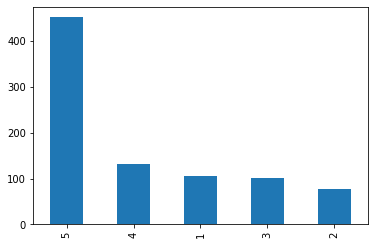

In [0]:
df.month.value_counts().plot(kind='bar')

In [0]:
df.to_csv('t10.csv', index=False)

In [0]:
all_filenames = ['t1.csv','t2.csv','t3.csv','t4.csv','t5.csv','t6.csv','t7.csv','t8.csv','t9.csv','t10.csv']

In [0]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "Twitter_Data.csv", index=False, encoding='utf-8-sig')

In [0]:
df=pd.read_csv("Twitter_Data.csv",keep_default_na=False) 

In [0]:
print(df.shape)
print(df.dtypes)
df.head()

(3521, 15)
username          object
text              object
retweets           int64
favorites          int64
replies            int64
tweet_id           int64
user_id            int64
date              object
hashtags          object
mentions          object
tweet_location    object
query             object
month              int64
year               int64
user_location     object
dtype: object


,username,text,retweets,favorites,replies,tweet_id,user_id,date,hashtags,mentions,tweet_location,query,month,year,user_location
0,sadboyzxy,"burn a cigarette, then talk.",0,2,0,1216974340152889345,1142701770994356225,2020-01-14 06:44:27+00:00,,,,Cigarette burn,1,2020,heaven
1,guiltydumb,"my fingertips, and my lips, they burn from the...",0,0,0,1219706002188095488,582557749,2020-01-21 19:39:06+00:00,,,,Cigarette burn,1,2020,
2,Nandime,When I used to burn nearly 30 cigarettes a day...,0,0,0,1221604565793021952,268182695,2020-01-27 01:23:19+00:00,#YouCanQuitToo #SmokeFreeUAE #KTForGood,,,Cigarette burn,1,2020,
3,l6_alkandri,Hold me between your fingers burn me like your...,0,0,0,1225012141855584256,4636072349,2020-02-05 11:03:48+00:00,,,,Cigarette burn,2,2020,kuwait city
4,Real_Rohit98,"#NoSmokingDay Don’t smoke, it’s not a joke. Do...",0,0,0,1237589924095770625,1160027935991930880,2020-03-11 04:03:25+00:00,#NoSmokingDay #WednesdayMotivation,@SaintRampalJiM,,Cigarette burn,3,2020,India


In [0]:
df['month'].value_counts()

5    1934
4     499
3     383
1     383
2     322
Name: month, dtype: int64

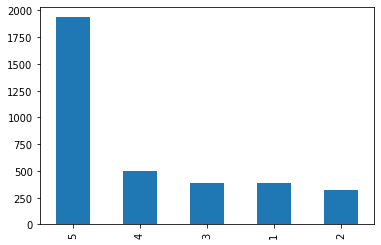

In [0]:
df.month.value_counts().plot(kind='bar')

In [0]:
df.duplicated().any()

False

In [0]:
# Checking if any user has made duplicate tweets
dupRows = df[df.duplicated(['text','username'])]
dupRows.sort_values(by=['username'], inplace=True)
dupRows

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,username,text,retweets,favorites,replies,tweet_id,user_id,date,hashtags,mentions,tweet_location,query,month,year,user_location
1845,BKWitharane,Promoting safe sex and family planning is impo...,0,3,0,1249617964799647745,971695338405834753,2020-04-13 08:38:34+00:00,,,,unwanted sex,4,2020,Sri Lanka
107,EktaKum42593873,"All boys , Actors, Artists &amp; Society that ...",0,0,0,1261300621107433472,718851553692528640,2020-05-15 14:21:16+00:00,,,,dirty boys,5,2020,"Bokaro Steel City, India"
106,EktaKum42593873,"...In this BB Show , ""Shiddhart Shukla"" in for...",0,0,0,1261300548923506689,718851553692528640,2020-05-15 14:20:59+00:00,,,,dirty boys,5,2020,"Bokaro Steel City, India"
2468,ItsPratsD,There's a difference between using abusives wi...,0,2,0,1261955844205187073,1202254991290798081,2020-05-17 09:44:53+00:00,,,,death threats,5,2020,"Mumbai, India"
2270,Mukesh_Pandya07,What about the almost synchronised attack on h...,0,0,0,1247540456520441859,143789010,2020-04-07 15:03:17+00:00,,,,death threats,4,2020,"Mumbai, India"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,sitiyuli5,"Destroy yourself, see who gives a fuck,",0,0,0,1262339279839088641,1862491807,2020-05-18 11:08:32+00:00,,,,fuck yourself,5,2020,jakarta
939,sitiyuli5,"Destroy yourself, see who gives a fuck,",0,0,0,1262037401112686596,1862491807,2020-05-17 15:08:58+00:00,,,,fuck yourself,5,2020,jakarta
891,sitiyuli5,"Destroy yourself, see who gives a fuck,",0,0,0,1261712576565506048,1862491807,2020-05-16 17:38:14+00:00,,,,fuck yourself,5,2020,jakarta
1153,sitiyuli5,"Destroy yourself, see who gives a fuck,",0,0,0,1263214976631631872,1862491807,2020-05-20 21:08:14+00:00,,,,fuck yourself,5,2020,jakarta


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   username        3521 non-null   object
 1   text            3521 non-null   object
 2   retweets        3521 non-null   int64 
 3   favorites       3521 non-null   int64 
 4   replies         3521 non-null   int64 
 5   tweet_id        3521 non-null   int64 
 6   user_id         3521 non-null   int64 
 7   date            3521 non-null   object
 8   hashtags        3521 non-null   object
 9   mentions        3521 non-null   object
 10  tweet_location  3521 non-null   object
 11  query           3521 non-null   object
 12  month           3521 non-null   int64 
 13  year            3521 non-null   int64 
 14  user_location   3521 non-null   object
dtypes: int64(7), object(8)
memory usage: 412.7+ KB


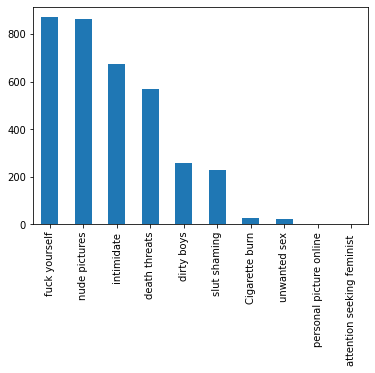

In [0]:
df['query'].value_counts().plot(kind='bar')
